In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import unicode_literals
from IPython.core.display import HTML
# from d3- import d3_lib

In [2]:
#reading in the Excel file
gdp_data = pd.read_excel('datasets/gdp_Download-GDPcurrent-USD-countries.xls', skiprows=2)

In [3]:
#creating a time-series
time_series = []
for column in gdp_data.columns:
    if type(column) == int:
        time_series.append(column)

In [4]:
#creating the country set
country_set = set(gdp_data.Country)

In [5]:
#creating the shortened versions of the indicators
meanings = {'Exports of goods and services':'Ex', 'General government final consumption expenditure':'G', 'Gross Domestic Product (GDP)':'GDP', 'Imports of goods and services':'Im', 'Household consumption expenditure (including Non-profit institutions serving households)':'C', 'Gross capital formation':'I'}

In [6]:
'''converts the long-form of the column name to the shortened version as per the meanings dict'''
def convertname(x):
    if x in meanings.keys():
        return meanings[x]
    else:
        return x

In [7]:
#an annonymous function that converts names in the IndicatorName columun into its shortened version per the meanings dict
converted_name = gdp_data.IndicatorName.map(lambda x: convertname(x))

In [8]:
#creates a new column to the end of the dataframe that is a concatenation of the country name and the shortened indicator name
gdp_data['Concat'] = gdp_data['Country']+ " " + converted_name

In [9]:
#sets the index column of the dataframe to the Concat column for ease of filtering
gdp_data.set_index('Concat', inplace=True)

In [10]:
#fills in all NaN values with 0's
gdp_data.fillna(0, inplace=True)

In [11]:
#converts all float data-types to integers
# for column in gdp_data.columns:
#     if gdp_data[column].dtype == float:
#         gdp_data[column] = gdp_data[column].astype(int)

In [12]:
#removes the index name as a header
gdp_data.index.name = None

In [13]:
#drops all rows that do not do not have abbreviated indicator names from the dataframe
abbv_list = ['C','I','G','Ex','Im', 'GDP']
for indicator in gdp_data.index:
    split_indicator = indicator.split()
    if split_indicator[-1].strip() not in abbv_list:
        gdp_data.drop(indicator, inplace = True)

In [14]:
#removing the Country and IndicatorName columns
remove_cols = ['IndicatorName', 'Country']
gdp_data.drop(remove_cols, axis=1, inplace=True)

In [15]:
#declaring chart variables

#reminder of which countries are available
print country_set
print '\n'

#user selects countries to investigate
user_country_select = raw_input('Please type in the name of the country or countries you want to investigate (separate with ", "): ')
user_country_list = list(user_country_select.split(', '))
print user_country_list 
print '\n'

print 'For Consumer/Personal consumption, type C' + '\n',\
'For Investment/Business consumption, type I' + '\n',\
'For Government consumption, type G' + '\n',\
'For Total Exports, type Ex' + '\n',\
'For Total Imports, type Im' + '\n',\
'For Aggregate consumption, type GDP'+ '\n'

user_indicator_select = raw_input('Please type in the abbrieviate name of the GDP Indicator.(separate with ", "): ')
user_indicator_list = list(user_indicator_select.split(', '))
print user_indicator_list
print '\n'

set([u'Canada', u'Sao Tome and Principe', u'Turkmenistan', u'Yugoslavia (Former)', u'Lithuania', u'Cambodia', u'Switzerland', u'Ethiopia', u'Aruba', u'Swaziland', u'Argentina', u'Cameroon', u'Burkina Faso', u'Ghana', u'Saudi Arabia', u'Japan', u'State of Palestine', u'Slovenia', u'Guatemala', u'Bosnia and Herzegovina', u'Kuwait', u'Russian Federation', u'Jordan', u'Dominica', u'Liberia', u'Maldives', u'Jamaica', u'Oman', u'Cabo Verde', u'Albania', u'Gabon', u'Monaco', u'Samoa', u'New Zealand', u'Yemen', u'Andorra', u'Greenland', u"Lao People's DR", u'United Arab Emirates', u'Czechoslovakia (Former)', u'India', u'Azerbaijan', u'Lesotho', u'Kenya', u'Tajikistan', u'Turkey', u'Afghanistan', u'Micronesia (FS of)', u'Bangladesh', u'Mauritania', u'Iran (Islamic Republic of)', u'Sudan (Former)', u'Saint Lucia', u'San Marino', u'French Polynesia', u'France', u'Syrian Arab Republic', u'Bermuda', u'Slovakia', u'Somalia', u'Peru', u'Vanuatu', u'Nauru', u'Seychelles', u'Norway', u'Malawi', u'Cook 

In [16]:
#grouping the indicators and countries
gdp_request_grouping = []

for indicator in user_indicator_list:
    inner_grouping = []
    for country in user_country_list:
        indicator_country = country +" "+ indicator
        if indicator == 'C':
            inner_grouping.append(indicator_country)
        elif indicator == 'I':
            inner_grouping.append(indicator_country)
        elif indicator == 'G':
            inner_grouping.append(indicator_country)
        elif indicator == 'Ex':
            inner_grouping.append(indicator_country)
        elif indicator == 'Im':
            inner_grouping.append(indicator_country)
        elif indicator == 'GDP':
            inner_grouping.append(indicator_country)
        else:
            print 'oops'
    gdp_request_grouping.append(inner_grouping)

print gdp_request_grouping

[[u'Poland I', u'United States I', u'Cuba I', u'Greece I'], [u'Poland G', u'United States G', u'Cuba G', u'Greece G'], [u'Poland GDP', u'United States GDP', u'Cuba GDP', u'Greece GDP']]


In [19]:
series1 = gdp_request_grouping[0][0]
series2 = gdp_request_grouping[0][1]
series3 = gdp_request_grouping[0][2]
series4 = gdp_request_grouping[0][3]
gdp_data.loc[[series1, series2, series3, series4]]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Poland I,5.778690e+09,6.365923e+09,7.042640e+09,8.346771e+09,9.394074e+09,1.013261e+10,1.081622e+10,1.235272e+10,1.404872e+10,1.591795e+10,...,5.975429e+10,7.390696e+10,1.063292e+11,1.289007e+11,8.821170e+10,1.021590e+11,1.186669e+11,1.050289e+11,9.950527e+10,1.104417e+11
United States I,2.298000e+11,2.553000e+11,2.888000e+11,3.326000e+11,3.507000e+11,3.416000e+11,4.129000e+11,4.898000e+11,5.839000e+11,6.598000e+11,...,3.040750e+12,3.233000e+12,3.235950e+12,3.059440e+12,2.525140e+12,2.752640e+12,2.877760e+12,3.126140e+12,3.257301e+12,3.455859e+12
Cuba I,1.476022e+09,1.793453e+09,2.109814e+09,2.588439e+09,2.953232e+09,3.381257e+09,3.583517e+09,3.682579e+09,4.608347e+09,5.047075e+09,...,4.594500e+09,6.186000e+09,5.968000e+09,9.026500e+09,6.788000e+09,6.482000e+09,5.889169e+09,6.271400e+09,6.846000e+09,7.151897e+09
Greece I,4.788280e+09,5.544895e+09,7.045834e+09,1.078525e+10,9.692995e+09,1.039278e+10,1.190714e+10,1.220621e+10,1.450784e+10,1.748521e+10,...,5.475689e+10,7.147412e+10,8.640755e+10,8.688614e+10,6.051146e+10,5.103588e+10,4.347087e+10,3.145359e+10,2.749482e+10,2.879975e+10


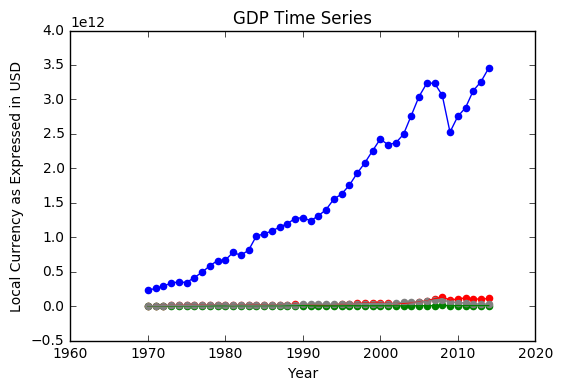

In [20]:
plt.title('GDP Time Series')
plt.plot(gdp_data.columns, gdp_data.loc[series1], color='red')
plt.plot(gdp_data.columns, gdp_data.loc[series2], color='blue')
plt.plot(gdp_data.columns, gdp_data.loc[series3], color='green')
plt.plot(gdp_data.columns, gdp_data.loc[series4], color='gray')
plt.scatter(time_series, gdp_data.loc[series1], color='red')
plt.scatter(time_series, gdp_data.loc[series2], color='blue')
plt.scatter(time_series, gdp_data.loc[series3], color='green')
plt.scatter(time_series, gdp_data.loc[series4], color='gray')
plt.xlabel('Year')
plt.ylabel('Local Currency as Expressed in USD')
plt.show()

In [39]:
HTML('''
<style>
.hello {
  color: red;
}
</style>
<h1 class="hello">Hello DOM!</h1>
<script>$(".hello").text("Goodybe, DOM")</script>
''')

In [42]:
#loading in the D3 library
HTML('<script src="lib/d3/d3.min.js"></script>')